In [144]:
import pandas as pd
import numpy as np
# 读出数据
X = pd.read_csv('../../datasets/home-data-for-ml-course/train.csv', index_col='Id')
X_test = pd.read_csv('../../datasets/home-data-for-ml-course/test.csv', index_col='Id')

# 去除标签为空的数据
X.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = X.SalePrice
X.drop(['SalePrice'], axis=1, inplace=True)

# 为了简化，我们把带有空值的列全部去除
col_with_missing_test = [col for col in X_test.columns if
                    X_test[col].isnull().any()]

col_with_missing_train = [col for col in X.columns if
                          X[col].isnull().any()]

col_with_missing_all = list(set(col_with_missing_test+col_with_missing_train))

X.drop(col_with_missing_all, axis=1, inplace=True)
X_test.drop(col_with_missing_all, axis=1, inplace=True)

In [145]:
print(len([col for col in X_test.columns if X_test[col].isna().any()]))
print(len([col for col in X.columns if X[col].isna().any()]))
print(X.shape)
print(X_test.shape)

0
0
(1460, 45)
(1459, 45)


In [146]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector

preprocessor = make_column_transformer(
    (StandardScaler(),
    make_column_selector(dtype_include=np.number)),
    (OneHotEncoder(sparse=False),
     make_column_selector(dtype_include=object))
)


In [147]:
X = preprocessor.fit_transform(X)
y = np.log(y)


In [148]:
input_shape = [X.shape[1]]
print("Input shape :{}".format(input_shape))

Input shape :[149]


In [149]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(256, activation='sigmoid', input_shape=input_shape),
    layers.Dense(128, activation='sigmoid'),
    layers.Dense(64, activation='sigmoid'),
    layers.Dense(1)
])

In [150]:
model.compile(
    optimizer='adam',
    loss='mae'
)

In [151]:
history = model.fit(
    X, y,
    batch_size=128,
    epochs=1000
)

Epoch 1/1000
12/12 [==============================] - 0s 1ms/step - loss: 10.6268
Epoch 2/1000
12/12 [==============================] - 0s 1ms/step - loss: 8.4899
Epoch 3/1000
12/12 [==============================] - 0s 1ms/step - loss: 7.2567
Epoch 4/1000
12/12 [==============================] - 0s 1ms/step - loss: 6.5132
Epoch 5/1000
12/12 [==============================] - 0s 1ms/step - loss: 5.9432
Epoch 6/1000
12/12 [==============================] - 0s 1ms/step - loss: 5.4221
Epoch 7/1000
12/12 [==============================] - 0s 1ms/step - loss: 4.9272
Epoch 8/1000
12/12

<AxesSubplot:>

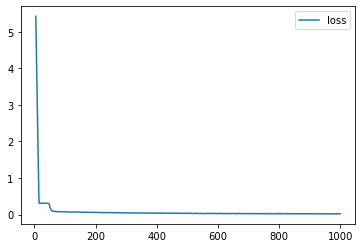

In [152]:
history_df = pd.DataFrame(history.history)

history_df.loc[5:, ['loss']].plot()

In [153]:
X_test = preprocessor.transform(X_test)

In [154]:
X_test.shape

(1459, 149)

In [155]:
preds = model.predict(X_test)
preds = preds.flatten()

In [156]:
X_test_origin = pd.read_csv('../../datasets/home-data-for-ml-course/test.csv', index_col='Id')
X_test_origin.drop(col_with_missing_all, inplace=True, axis=1)

In [157]:
print(preds.shape)
print(X_test_origin.index.shape)

(1459,)
(1459,)


In [158]:
output = pd.DataFrame({'Id':X_test_origin.index,
                       'SalePrice':preds})

output.to_csv('./dl_submission.csv', index=False)

In [143]:
print(preds.shape)

(1459,)
